In [547]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

#### Functions for importing, cleaning, and sub-setting data XRF whole rock chemistry data.

## Test

In [548]:
rawdata = csv_to_df('tuolumnedata_csvready.csv')

# Use function to extract major oxides, fill NaN values with '0', ensure all values are float types for future calculations.
cleaned_df = extract_MajorOx(rawdata)
cleaned_df = cleaned_df.fillna(0)
cleaned_df = cleaned_df.replace('n.d.',0)
cleaned_df = cleaned_df.astype(float)

Columns:['Sample', 'Type', 'SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'Cr2O3', 'FeO', 'MnO', 'MgO', 'NiO', 'CoO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'H2O', 'CO2', 'SO3', 'Cl2O-1', 'F2O-1', 'LOI (%)', 'sumMaj+LOI', 'sumAll', 'F >=', 'Cl >=', 'SO3 >=', 'Br >=', 'As >=', 'Ni', 'Cr', 'V', 'Sc', 'Cu', 'Zn', 'Ga', 'Ba', 'Rb', 'Cs', 'Sr', 'Y', 'Zr', 'Hf', 'Nb', 'Ta', 'Mo', 'La', 'Ce', 'Nd', 'Sm', 'Dy', 'Yb', 'Th', 'U', 'Tl', 'Pb', 'Sn', 'Bi', 'Sb']

 .csv file successfully imported.

 Major oxides extracted.


### Error calculations for experimental XRF data

In [536]:
## Should be eventually replaced with a scaleable loop, but for now, this works.
error_table = rawdata.iloc[-6:, 2:]
error_table = error_table.fillna(0)
error_table = error_table.replace('n.d.',0)

error_table=error_table.astype(float)
error1 = abs(error_table.iloc[0,:] - error_table.iloc[3,:]) #Absolute value of experimental error
error_table.loc['error1'] = error1

error2 = abs(error_table.iloc[1,:] - error_table.iloc[4,:]) #Absolute value of experimental error
error_table.loc['error2'] = error2

error3 = abs(error_table.iloc[2,:] - error_table.iloc[5,:]) #Absolute value of experimental error
error_table.loc['error3'] = error3

avg_error = (error1 + error2 + error3) / 3
error_table.loc['avg_error'] = avg_error

cleaned_df.loc['XRF_error'] = avg_error

error_table = error_table.iloc[-4:,:]

In [537]:
## Standard deviation
N=3
for i in range(N):
    s = (error_table.iloc[(i),:] - error_table.iloc[3,:])**2
    s = s * (1/3)
    s = np.sqrt(s)

In [538]:
for i in range(N):
    seom = s / np.sqrt(N)
    
error_table.loc['seom'] = seom
cleaned_df.loc['seom'] = seom

error_table = error_table.fillna(0)
error_table

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,SO3,Cl2O-1,F2O-1,LOI (%),sumMaj+LOI,sumAll,F >=,Cl >=,SO3 >=,Br >=,As >=,Ni,Cr,V,Sc,Cu,Zn,Ga,Ba,Rb,Cs,Sr,Y,Zr,Hf,Nb,Ta,Mo,La,Ce,Nd,Sm,Dy,Yb,Th,U,Tl,Pb,Sn,Bi,Sb
error1,0.364497,0.003682,0.040144,0.0,0.0,0.110367,0.001144,0.019102,0.0,0.0,0.000791,0.039730,0.019544,0.001870,0.0,0.0,0.0,0.0,0.0,0.0,0.588183,0.506920,0.070721,0.000546,0.012758,2.501743,2.182407,3.217745,0.226813,0.447458,1.001073,1.245376,1.452765,0.862997,16.384137,0.355414,1.860197,1.291192,1.798627,8.035345,0.772015,1.628967,0.108994,0.848976,1.314682,3.623710,1.234173,0.351393,0.497115,0.182302,0.137323,0.113917,0.761773,1.103507,2.985603,0.008599,3.641769
error2,0.624184,0.019661,0.037999,0.0,0.0,0.093277,0.003327,0.003784,0.0,0.0,0.005577,0.077348,0.014036,0.006441,0.0,0.0,0.0,0.0,0.0,0.0,0.857561,0.857466,0.031720,0.000599,0.028708,4.510393,2.341279,1.271984,1.430923,0.366046,0.394225,0.627288,0.079826,0.506907,2.610565,0.229791,0.927675,6.321737,1.221748,8.405877,0.924108,1.068191,0.016138,0.416776,0.068130,0.779751,1.316612,0.190455,0.278685,1.348038,0.307694,0.293883,0.029954,0.201020,1.720000,0.113520,0.443106
error3,0.002948,0.002174,0.075641,0.0,0.0,0.072974,0.000455,0.004134,0.0,0.0,0.020911,0.065567,0.002191,0.000472,0.0,0.0,0.0,0.0,0.0,0.0,0.085908,0.044928,0.040077,0.001146,0.002042,7.000000,0.558907,1.604680,0.885302,1.461777,0.298281,0.313055,1.992842,0.337313,6.742246,0.245457,0.920735,3.215084,1.799207,6.961306,2.805247,1.542350,0.770527,0.060783,0.088272,3.907299,1.297822,0.424768,0.074344,0.446952,0.395596,0.340000,0.047349,0.871338,0.880000,0.032311,0.220000
avg_error,0.330543,0.008506,0.051261,0.0,0.0,0.092206,0.001642,0.009007,0.0,0.0,0.009093,0.060881,0.011924,0.002928,0.0,0.0,0.0,0.0,0.0,0.0,0.510551,0.469771,0.047506,0.000764,0.014503,4.670712,1.694198,2.031470,0.847679,0.758427,0.564526,0.728573,1.175144,0.569073,8.578983,0.276888,1.236203,3.609338,1.606527,7.800843,1.500457,1.413169,0.298553,0.442178,0.490361,2.770253,1.282869,0.322205,0.283381,0.659097,0.280205,0.249267,0.279692,0.725288,1.861868,0.051477,1.434958
seom,0.109198,0.002111,0.008127,0.0,0.0,0.006411,0.000396,0.001624,0.0,0.0,0.003939,0.001562,0.003244,0.000818,0.0,0.0,0.0,0.0,0.0,0.0,0.141548,0.141614,0.002476,0.000127,0.004153,0.776429,0.378430,0.142263,0.012541,0.234450,0.088748,0.138506,0.272566,0.077253,0.612246,0.010477,0.105156,0.131418,0.064226,0.279846,0.434930,0.043060,0.157325,0.127132,0.134030,0.379015,0.004984,0.034187,0.069679,0.070715,0.038464,0.030244,0.077448,0.048683,0.327289,0.006389,0.404986


In [539]:
id = rawdata['Sample']
type = rawdata['Type']

In [540]:
cleaned_df

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,SO3,Cl2O-1,F2O-1
0,66.066406,0.548861,15.624385,0.0,0.0,3.732880,0.076576,1.524711,0.0,0.0,3.776396,3.642991,3.377294,0.179945,0.0,0.0,0.0,0.0,0.0
1,59.488558,0.885564,16.893312,0.0,0.0,6.088012,0.105994,3.120577,0.0,0.0,5.791956,3.472646,2.432116,0.214490,0.0,0.0,0.0,0.0,0.0
2,63.811922,0.644781,16.617554,0.0,0.0,4.147709,0.085269,1.756226,0.0,0.0,4.521935,4.016627,2.876374,0.219198,0.0,0.0,0.0,0.0,0.0
3,68.591354,0.438112,15.640367,0.0,0.0,2.427771,0.063995,0.777234,0.0,0.0,2.696797,4.550226,3.315973,0.162275,0.0,0.0,0.0,0.0,0.0
4,75.820463,0.081973,12.946199,0.0,0.0,0.663837,0.031223,0.089308,0.0,0.0,0.702542,4.374870,4.009420,0.008794,0.0,0.0,0.0,0.0,0.0
5,67.622928,0.475611,15.900443,0.0,0.0,2.794764,0.056634,0.875509,0.0,0.0,3.407064,4.469777,2.902462,0.195939,0.0,0.0,0.0,0.0,0.0
6,76.363613,0.069413,12.654557,0.0,0.0,0.517922,0.023925,0.054598,0.0,0.0,0.540023,3.972797,4.609559,0.005901,0.0,0.0,0.0,0.0,0.0
7,65.146071,0.546541,16.125992,0.0,0.0,3.654955,0.072742,1.580363,0.0,0.0,3.875722,3.658421,3.755211,0.195418,0.0,0.0,0.0,0.0,0.0
8,76.616213,0.079309,12.481429,0.0,0.0,0.623441,0.026245,0.055272,0.0,0.0,0.530665,3.981179,4.460937,0.003877,0.0,0.0,0.0,0.0,0.0
9,69.494990,0.447260,14.881052,0.0,0.0,2.559606,0.061803,0.804506,0.0,0.0,2.784781,4.268707,3.132743,0.168059,0.0,0.0,0.0,0.0,0.0


In [541]:
cleaned_df.insert(0, 'type', rawdata['Type'])

In [542]:
cleaned_df.insert(0, 'id', rawdata['Sample'])

In [543]:
aplite_data = cleaned_df.iloc[ [0,1,2,3,4,5,6,7,8,19], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]

In [544]:
aplite_data

,id,type,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,SO3,Cl2O-1,F2O-1
0,KHD105H,host,66.066406,0.548861,15.624385,0.0,0.0,3.732880,0.076576,1.524711,0.0,0.0,3.776396,3.642991,3.377294,0.179945,0.0,0.0,0.0,0.0,0.0
1,KKC103B,host,59.488558,0.885564,16.893312,0.0,0.0,6.088012,0.105994,3.120577,0.0,0.0,5.791956,3.472646,2.432116,0.214490,0.0,0.0,0.0,0.0,0.0
2,KHD107B,host,63.811922,0.644781,16.617554,0.0,0.0,4.147709,0.085269,1.756226,0.0,0.0,4.521935,4.016627,2.876374,0.219198,0.0,0.0,0.0,0.0,0.0
3,KCP109D,host,68.591354,0.438112,15.640367,0.0,0.0,2.427771,0.063995,0.777234,0.0,0.0,2.696797,4.550226,3.315973,0.162275,0.0,0.0,0.0,0.0,0.0
4,KCP109C,aplite,75.820463,0.081973,12.946199,0.0,0.0,0.663837,0.031223,0.089308,0.0,0.0,0.702542,4.374870,4.009420,0.008794,0.0,0.0,0.0,0.0,0.0
5,KCP114B,host,67.622928,0.475611,15.900443,0.0,0.0,2.794764,0.056634,0.875509,0.0,0.0,3.407064,4.469777,2.902462,0.195939,0.0,0.0,0.0,0.0,0.0
6,KCP109B,aplite,76.363613,0.069413,12.654557,0.0,0.0,0.517922,0.023925,0.054598,0.0,0.0,0.540023,3.972797,4.609559,0.005901,0.0,0.0,0.0,0.0,0.0
7,KHD106B,host,65.146071,0.546541,16.125992,0.0,0.0,3.654955,0.072742,1.580363,0.0,0.0,3.875722,3.658421,3.755211,0.195418,0.0,0.0,0.0,0.0,0.0
8,KCP109A,aplite,76.616213,0.079309,12.481429,0.0,0.0,0.623441,0.026245,0.055272,0.0,0.0,0.530665,3.981179,4.460937,0.003877,0.0,0.0,0.0,0.0,0.0
seom,NaN,NaN,0.109198,0.002111,0.008127,0.0,0.0,0.006411,0.000396,0.001624,0.0,0.0,0.003939,0.001562,0.003244,0.000818,0.0,0.0,0.0,0.0,0.0


#### This is a clean major oxide DataFrame with the standard error of the mean (seom) for Harker diagram plotting.

#### Harker Diagram plotting

In [545]:
oxide_colors = {
    'SiO2': (0.321, 0.667, 0.369),
    'TiO2': (0.298, 0.294, 0.388),
    'Al2O3': (0.529, 0.749, 1.0),
    'FeO': (0.980, 0.286, 0.380),
    'MnO': (1.0, 0.725, 1.0),
    'MgO': (0.706, 0.878, 0.573),
    'CaO': (0.929, 0.490, 0.051),
    'Na2O': (0.0, 0.839, 0.788),
    'K2O': (0.757, 0.475, 0.875),
    'P2O5': (0.918, 0.769, 0.208),
    'H2O': (0.929, 0.808, 0.612),
    'CO2': (0.988, 0.545, 0.467),
    'SO3': (0.0, 0.0, 0.0),
}


IndexError: single positional indexer is out-of-bounds

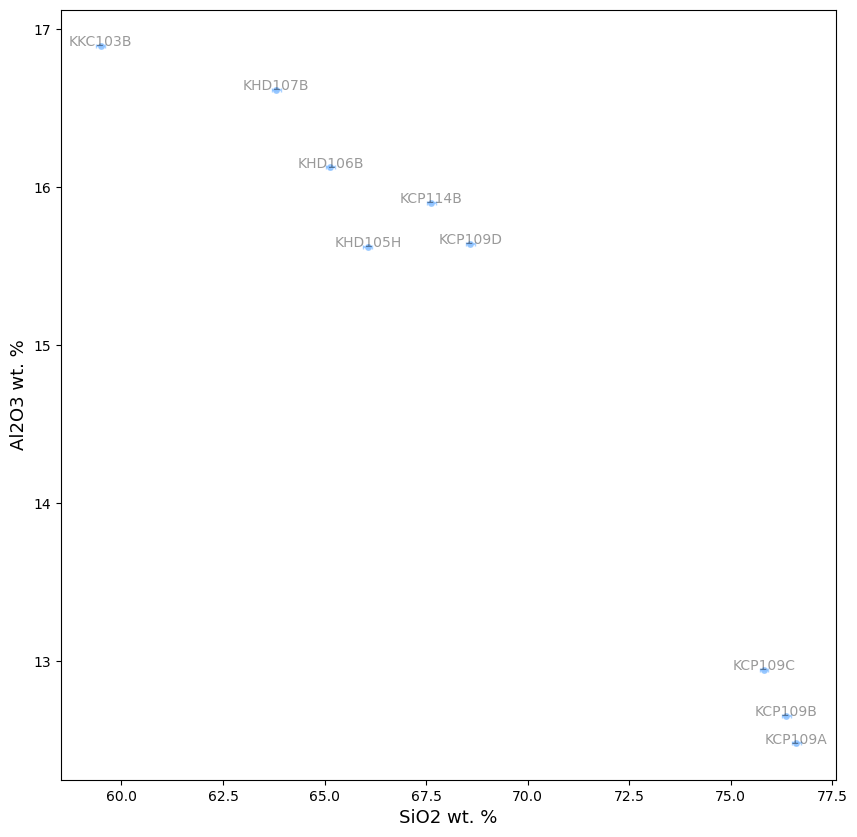

In [546]:
x_oxide = 'SiO2'
y_oxide = 'Al2O3'
datalabels = aplite_data['id']

x_data = aplite_data[f'{x_oxide}'].iloc[0:9]
xlabel = f'{x_oxide} wt. %'
xerr = aplite_data[f'{x_oxide}'].iloc[-1]

y_data = aplite_data[f'{y_oxide}'].iloc[0:9]
ylabel = f'{y_oxide} wt. %'
yerr = aplite_data[f'{y_oxide}'].iloc[-1]

fig, ax = harker_diagram(10,10, '', x_data, xerr, xlabel, y_data, yerr, ylabel, datalabels, colorlist=oxide_colors[y_oxide])

In [550]:
cleaned_df.to_csv('aplite_data.csv', index=False)